Assignment 1:


• Consider a case of 50 student, out of which 35Passed (P) and 15 Failed
(F) in the Certification Exam.
Write a program to compute Entropy for
the given information.



• If we have the information that some of the candidates have undergone
training and some didn’t. 
Based on it split the dataset, let say 20 people
undergone the training and 30 didn’t. 
Out of this 20 trained candidate
18P and 2F, while in case of 30 untrained 17P and 13F. 
Write a
program to calculate the information gain after split of data.



Project 1:
From Data given it is required to develop the model to predict the profit of the company.
 Dataset file
name: Companies-profit.csv
Task:

1) Load the dataset

2) Analyse the data visually and give justification for selecting particular algorithm for developing the
model.

3) Split it into test and train.

4) Develop a model for predicting the profit of the company

5) Measure all the parameters of the model

6) Measure the performance of the model



Project 2:



Use wine dataset from sklearn
Load the dataset and split it into test and train.

Develop the model to Classify wines into different categories.

Train the model using Gaussian and Multinominal classifier, please mention
which model is better and why.

• Use the trained model to perform some predictions on test data.



Project 3:

• Datasets for Disease operation is provided. Dataset file name: Disease.csv
1. Load the dataset and split it into test and train.
2. Analyse the Data Visually.
3. Find limitation with data if any in developing the model
4. Develop the model to identify whether operation successful or not using
Decision Tree algorithm
5. Measure the performance of the model
6. Try to improvise the model by suitable technique.
7. Measure the performance of the model

Project: 4

• Use iris flower dataset from
sklearn library and try to
form clusters of flowers
using petal width and length
features.
• Analyse the Data Visually
before training
• Drop other two features for
simplicity.
• Try to Use K Mean
Clustering
• Analyse the Data Visually by
comparing before and after
the training.

Practice: Exercise 1
1. What is K-Nearest Neighbour(KNN) Algorithm for Machine Learning
2. How does K-NN work?
3. Implementation of the KNN algorithm- Take dataset: diabetes.csv

• Data Pre-processing step-if any

• Fitting the K-NN algorithm to the Training set
• Predicting the test result

• Test accuracy of the result


In [1]:
import numpy as np
(- (35/50) * np.log((35/50))) - ((15/50) * np.log((15/50)))

0.6108643020548935

In [2]:
import pandas as pd
data=pd.read_csv('Companies-profit.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,City,Profit
0,165349.20,136897.80,471784.10,Mumbai,192261.83
1,162597.70,151377.59,443898.53,Bangalore,191792.06
2,153441.51,101145.55,407934.54,Delhi,191050.39
3,144372.41,118671.85,383199.62,Mumbai,182901.99
4,142107.34,91391.77,366168.42,Delhi,166187.94


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data.shape

(1000, 5)

In [5]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
City                object
Profit             float64
dtype: object

In [6]:
missing= data.isnull().sum().sort_values(ascending=False)
percent= (data.isnull().sum()/data.isnull().count())
total= pd.concat([missing, percent],axis=1, keys=["Total", "Percent"])
print(total)

                 Total  Percent
Profit               0      0.0
City                 0      0.0
Marketing Spend      0      0.0
Administration       0      0.0
R&D Spend            0      0.0


In [7]:
numeric= data.select_dtypes(include=[np.number])
numeric

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.800,471784.1000,192261.83000
1,162597.70,151377.590,443898.5300,191792.06000
2,153441.51,101145.550,407934.5400,191050.39000
3,144372.41,118671.850,383199.6200,182901.99000
4,142107.34,91391.770,366168.4200,166187.94000
...,...,...,...,...
995,54135.00,118451.999,173232.6695,95279.96251
996,134970.00,130390.080,329204.0228,164336.60550
997,100275.47,241926.310,227142.8200,413956.48000
998,128456.23,321652.140,281692.3200,333962.19000


In [8]:
categorical= data.select_dtypes(include=[np.object])
categorical

,City
0,Mumbai
1,Bangalore
2,Delhi
3,Mumbai
4,Delhi
...,...
995,Bangalore
996,Bangalore
997,Bangalore
998,Bangalore


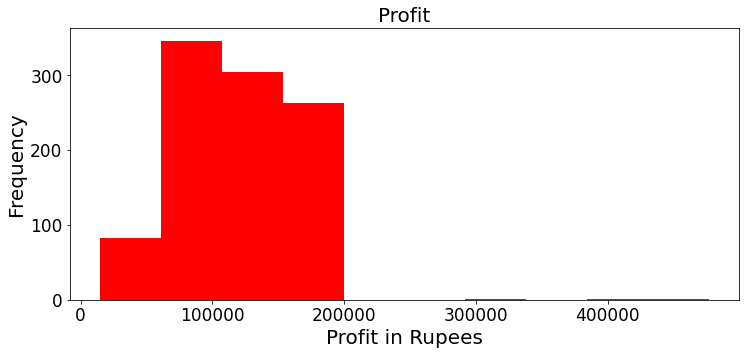

In [9]:
plt.figure(figsize=(12,5))
plt.hist(data["Profit"],color="red")
plt.title("Profit", size=20)
plt.ylabel("Frequency", size=20)
plt.xlabel("Profit in Rupees", size=20)
plt.tick_params(labelsize=17)
# plt.tick_params(labelsize=20)
# ax.xaxis.set_tick_params(labelsize=20)
# ax.yaxis.set_tick_params(labelsize=20)
plt.show()

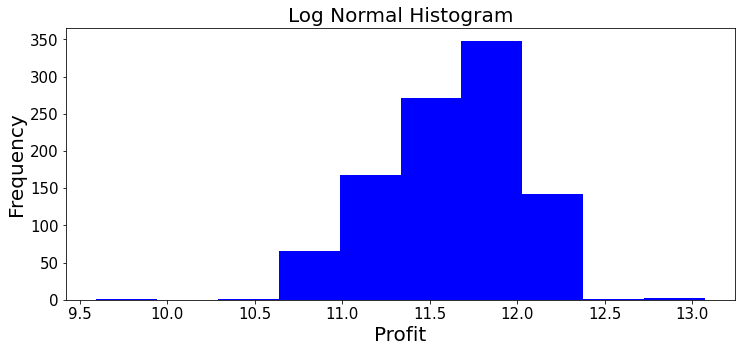

In [10]:
target= np.log(data["Profit"])
plt.figure(figsize=(12,5))
plt.hist(target, color="blue")
plt.xlabel("Profit", size=20)
plt.ylabel("Frequency", size=20)
plt.title("Log Normal Histogram", size=20)
plt.tick_params(labelsize=15)
plt.show()

In [11]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values

In [12]:
y

array([192261.83   , 191792.06   , 191050.39   , 182901.99   ,
       166187.94   , 156991.12   , 156122.51   , 155752.6    ,
       152211.77   , 149759.96   , 146121.95   , 144259.4    ,
       141585.52   , 134307.35   , 132602.65   , 129917.04   ,
       126992.93   , 125370.37   , 124266.9    , 122776.86   ,
       118474.03   , 111313.02   , 110352.25   , 108733.99   ,
       108552.04   , 107404.34   , 105733.54   , 105008.31   ,
       103282.38   , 101004.64   ,  99937.59   ,  97483.56   ,
        97427.84   ,  96778.92   ,  96712.8    ,  96479.51   ,
        90708.19   ,  89949.14   ,  81229.06   ,  81005.76   ,
        78239.91   ,  77798.83   ,  71498.49   ,  69758.98   ,
        65200.33   ,  64926.08   ,  49490.75   ,  42559.73   ,
        35673.41   ,  14681.4    , 123485.2464 ,  82155.48418,
       125867.0108 , 104976.1696 ,  89803.10053,  75297.23305,
       114284.5283 , 171985.0761 ,  72337.96774, 169566.5772 ,
       158670.9451 , 114522.8756 ,  85842.60573, 101106

In [13]:
X.shape

(1000, 4)

In [14]:
correlation= numeric.corr()
correlation

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.582434,0.978407,0.945245
Administration,0.582434,1.000000,0.520465,0.741560
Marketing Spend,0.978407,0.520465,1.000000,0.917270
Profit,0.945245,0.741560,0.917270,1.000000


In [15]:
correlation["Profit"].sort_values(ascending=False)*100

Profit             100.000000
R&D Spend           94.524529
Marketing Spend     91.727018
Administration      74.156027
Name: Profit, dtype: float64

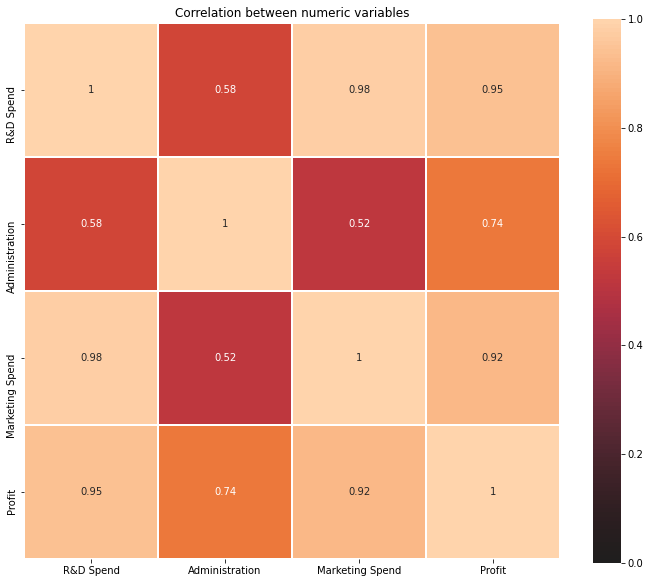

In [16]:
plt.subplots(figsize=(12,10))
plt.title("Correlation between numeric variables")
sns.heatmap(correlation, square=True, vmin=0, vmax=1, center=0, annot=True, linewidths=0.5)
plt.show()

c:\users\jagadish\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


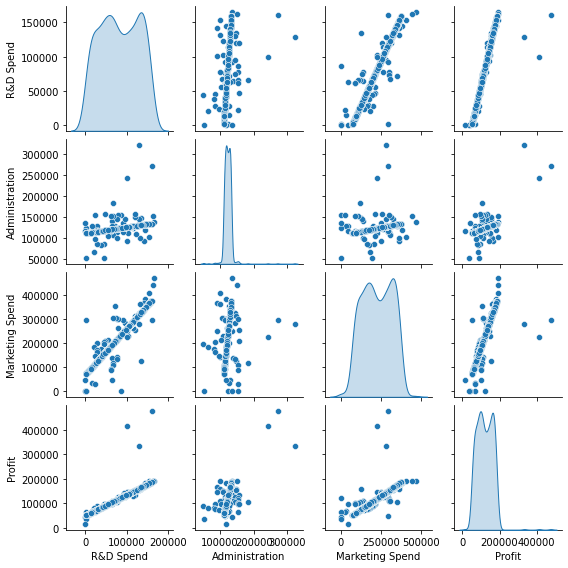

In [17]:
columns= ["R&D Spend", "Administration", "Marketing Spend", "Profit"]
sns.pairplot(data[columns],size=2, kind="scatter", diag_kind="kde")
plt.show()

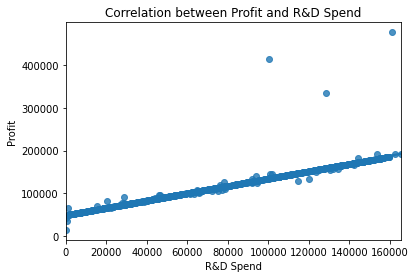

In [18]:
sns.regplot(x="R&D Spend", y="Profit", data=data)
plt.title("Correlation between Profit and R&D Spend")
plt.xlabel("R&D Spend")
plt.ylabel("Profit")

plt.show()

<AxesSubplot:xlabel='Marketing Spend', ylabel='Profit'>

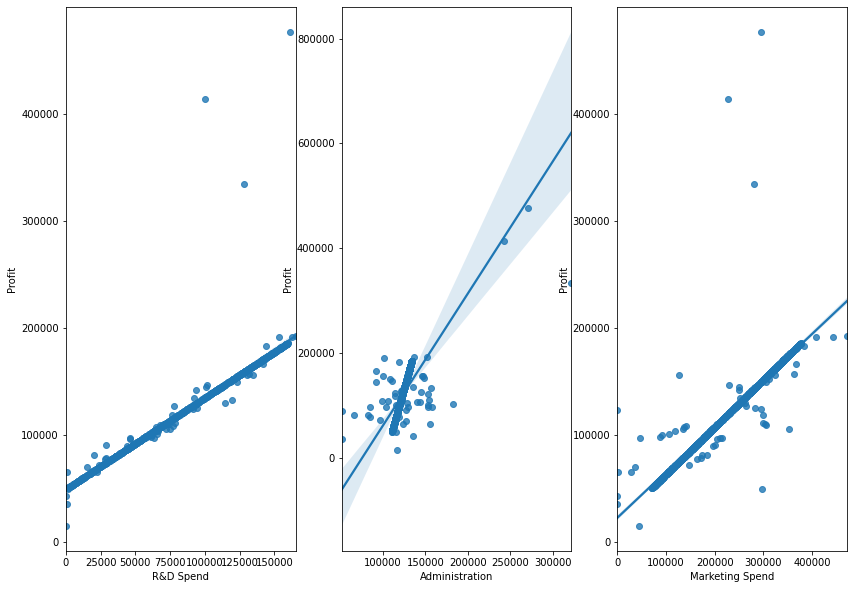

In [19]:
fig, axs = plt.subplots(ncols=3, figsize=(14,10))
sns.regplot(x='R&D Spend', y='Profit', scatter= True, data=data, ax=axs[0])
sns.regplot(x='Administration', y='Profit', scatter=True, data=data, ax=axs[1])
sns.regplot(x='Marketing Spend',y='Profit', scatter=True, data=data, ax=axs[2])

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder= LabelEncoder()
X[:,3]= labelencoder.fit_transform(X[:, 3])

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=5)

In [22]:
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [23]:
pred= lm.predict(X_test)

In [24]:
print(lm.intercept_)
print(lm.coef_)

-83040.3025297069
[5.73760387e-01 1.14788348e+00 6.28383428e-02 2.68473855e+02]


In [25]:
list(zip(data, lm.coef_))

[('R&D Spend', 0.5737603874436824),
 ('Administration', 1.1478834832243088),
 ('Marketing Spend', 0.06283834277364653),
 ('City', 268.4738552853328)]

In [26]:
print("R square is {}:".format(lm.score(X_test,y_test)))

R square is 0.9648909018228169:


In [27]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [28]:
print("MAE:", metrics.mean_absolute_error(pred, y_test))

MAE: 1590.349427111749


In [29]:
print("RMSE:", np.sqrt(metrics.mean_squared_error(pred, y_test)))

RMSE: 7481.645711203669


In [30]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

plt.style.use("ggplot")

from sklearn import naive_bayes
from sklearn.datasets import load_wine
rdata = load_wine()

In [31]:
print(rdata['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [32]:
for key,value in rdata.items():
    print(key,'\n',value,'\n')

data 
 [[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]] 

target 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] 

frame 
 None 

target_names 
 ['class_0' 'class_1' 'class_2'] 

DESCR 
 .. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in 

In [33]:
features = pd.DataFrame(data=rdata['data'],columns=rdata['feature_names'])
data = features
data['target']=rdata['target']
data['class']=data['target'].map(lambda ind: rdata['target_names'][ind])
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


c:\users\jagadish\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='alcohol'>

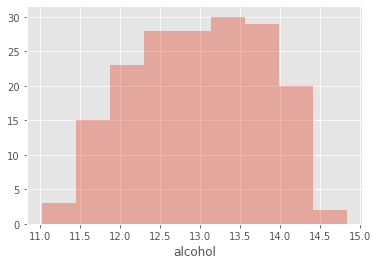

In [34]:
sns.distplot(data['alcohol'],kde=0)

c:\users\jagadish\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\jagadish\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\jagadish\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

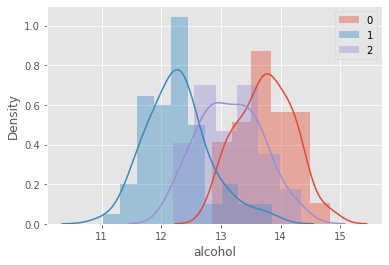

In [35]:
for i in data.target.unique():
    sns.distplot(data['alcohol'][data.target==i],
                 kde=1,label='{}'.format(i))

plt.legend()

alcohol


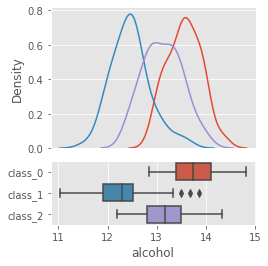

malic_acid


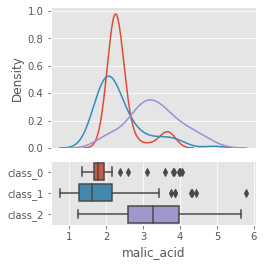

ash


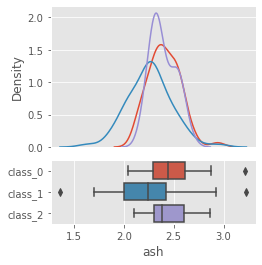

alcalinity_of_ash


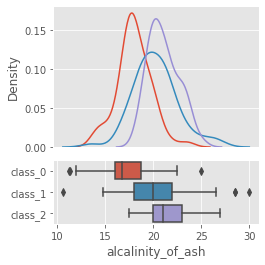

magnesium


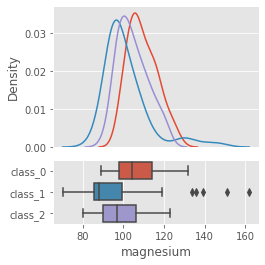

total_phenols


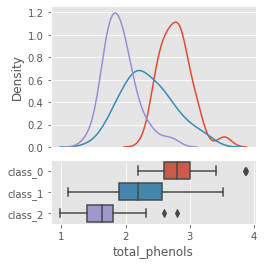

flavanoids


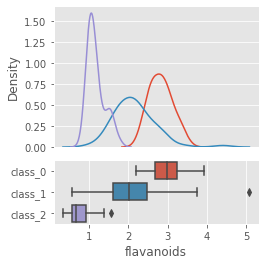

nonflavanoid_phenols


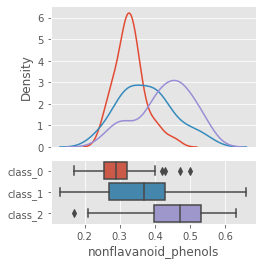

proanthocyanins


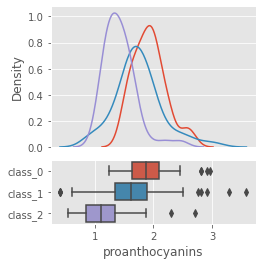

color_intensity


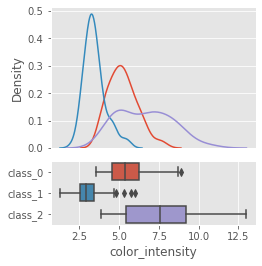

hue


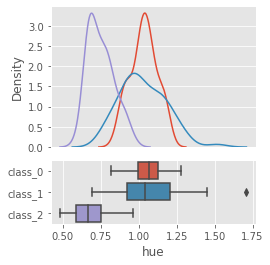

od280/od315_of_diluted_wines


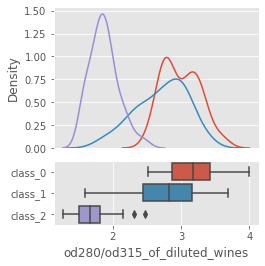

proline


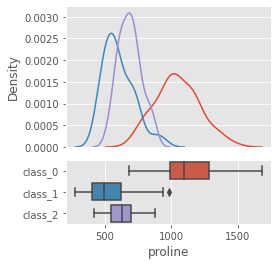

In [36]:
import matplotlib.gridspec as gridspec
for feature in rdata['feature_names']:
    print(feature)
    #sns.boxplot(data=data,x=data.target,y=data[feature])
    gs1 = gridspec.GridSpec(3,1)
    ax1 = plt.subplot(gs1[:-1])
    ax2 = plt.subplot(gs1[-1])
    gs1.update(right=0.60)
    sns.boxplot(x=feature,y='class',data=data,ax=ax2)
    sns.kdeplot(data[feature][data.target==0],ax=ax1,label='0')
    sns.kdeplot(data[feature][data.target==1],ax=ax1,label='1')
    sns.kdeplot(data[feature][data.target==2],ax=ax1,label='2')
    ax2.yaxis.label.set_visible(False)
    ax1.xaxis.set_visible(False)
    plt.show()

In [37]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

plt.style.use("ggplot")

from sklearn import naive_bayes

In [38]:
dataset = datasets.load_wine()
X = dataset.data; y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [39]:
model = naive_bayes.GaussianNB()
model.fit(X_train, y_train)
print(model)

GaussianNB()


In [40]:
expected_y  = y_test
predicted_y = model.predict(X_test)

In [41]:
print(metrics.classification_report(expected_y, predicted_y, target_names=dataset.target_names))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

     class_0       0.94      0.94      0.94        17
     class_1       0.95      0.95      0.95        20
     class_2       1.00      1.00      1.00         8

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

[[16  1  0]
 [ 1 19  0]
 [ 0  0  8]]


In [42]:
model = naive_bayes.MultinomialNB()
model.fit(X_train, y_train)
print(); 
print(model)


MultinomialNB()


In [43]:
expected_y  = y_test
predicted_y = model.predict(X_test)

In [44]:
print(metrics.classification_report(expected_y, predicted_y,target_names=dataset.target_names))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

     class_0       1.00      0.88      0.94        17
     class_1       0.86      0.90      0.88        20
     class_2       0.78      0.88      0.82         8

    accuracy                           0.89        45
   macro avg       0.88      0.89      0.88        45
weighted avg       0.90      0.89      0.89        45

[[15  2  0]
 [ 0 18  2]
 [ 0  1  7]]


Conclusion: 
    
As showed in this project the Naive Bayes Classifiers, I feel the accuracy of GaussianNB is better than MultinomialNB. 
So i would go for GaussianNB.

In [45]:
import pandas as pd
import numpy as np 
import matplotlib as plt
%matplotlib inline
import seaborn as sns

In [46]:
df=pd.read_csv("Disease.csv")
df.head()

,Disease,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Disease  81 non-null     object
 1   Age      81 non-null     int64 
 2   Number   81 non-null     int64 
 3   Start    81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.3+ KB


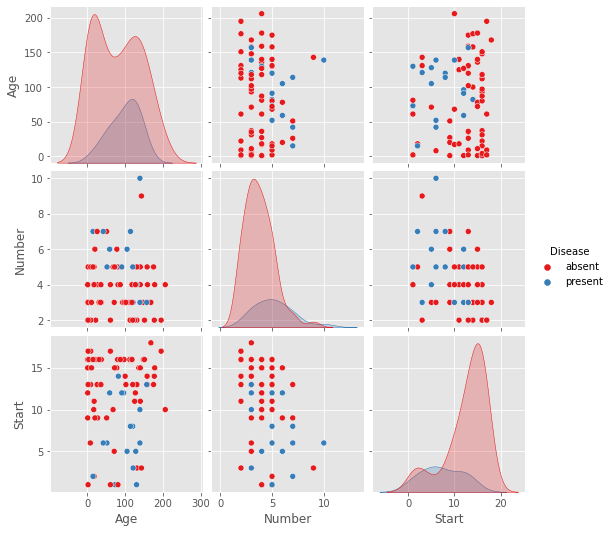

In [48]:
sns.pairplot(df, hue='Disease', palette='Set1')

In [49]:
from sklearn.model_selection import train_test_split
X=df.drop("Disease",axis=1)
y=df["Disease"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
from sklearn.tree import DecisionTreeClassifier

In [50]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
pred=dt.predict(X_test)
pred

array(['absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'present', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'present', 'present',
       'absent'], dtype=object)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[16  5]
 [ 4  0]]
              precision    recall  f1-score   support

      absent       0.80      0.76      0.78        21
     present       0.00      0.00      0.00         4

    accuracy                           0.64        25
   macro avg       0.40      0.38      0.39        25
weighted avg       0.67      0.64      0.66        25



In [54]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [55]:
pred_rf=rf.predict(X_test)
pred_rf

array(['absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent'], dtype=object)

In [56]:
print(confusion_matrix(y_test,pred_rf))
print(classification_report(y_test,pred_rf))

[[18  3]
 [ 4  0]]
              precision    recall  f1-score   support

      absent       0.82      0.86      0.84        21
     present       0.00      0.00      0.00         4

    accuracy                           0.72        25
   macro avg       0.41      0.43      0.42        25
weighted avg       0.69      0.72      0.70        25



In [57]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sklearn.metrics as sm
%matplotlib inline

In [58]:
iris = datasets.load_iris()
print (iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [59]:

print (iris.target_names)

['setosa' 'versicolor' 'virginica']


In [60]:

print (iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [61]:
x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])

In [62]:

x.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [63]:
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


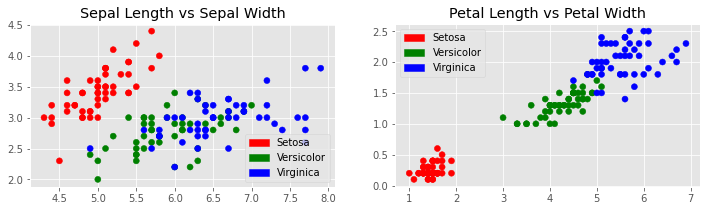

In [64]:
plt.figure(figsize=(12,3))
colors = np.array(['red', 'green', 'blue'])
iris_targets_legend = np.array(iris.target_names)
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')


plt.subplot(1, 2, 1)
plt.scatter(x['Sepal Length'], x['Sepal Width'], c=colors[y['Target']])
plt.title('Sepal Length vs Sepal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1,2,2)
plt.scatter(x['Petal Length'], x['Petal Width'], c= colors[y['Target']])
plt.title('Petal Length vs Petal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

In [65]:
#just taking clusters as 3 for instance
iris_k_mean_model = KMeans(n_clusters=3)
iris_k_mean_model.fit(x)

KMeans(n_clusters=3)

In [66]:
print (iris_k_mean_model.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [67]:
print (iris_k_mean_model.cluster_centers_)

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


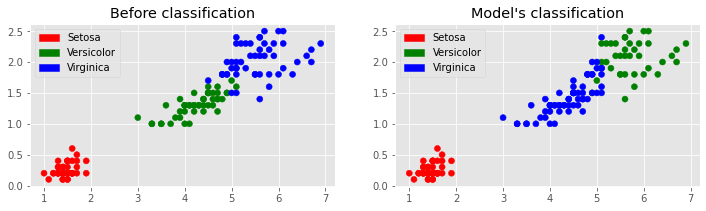

In [68]:

plt.figure(figsize=(12,3))

colors = np.array(['red', 'green', 'blue'])

predictedY = np.choose(iris_k_mean_model.labels_, [1, 0, 2]).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[y['Target']])
plt.title('Before classification')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1, 2, 2)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[predictedY])
plt.title("Model's classification")
plt.legend(handles=[red_patch, green_patch, blue_patch])

In [69]:
sm.accuracy_score(predictedY, y['Target'])

0.44

In [70]:
#Confustion matrix measure

sm.confusion_matrix(predictedY, y['Target'])

array([[50,  0,  0],
       [ 0,  2, 36],
       [ 0, 48, 14]], dtype=int64)